<a href="https://colab.research.google.com/github/mare-a/EjercicioP3/blob/rama-cristian/Clase3_practicav2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv('/content/attacks.csv', encoding='latin1')

df = pd.DataFrame(data)

df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [13]:
#df['Sex']
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [14]:
#Limpieza de datos
df_clean=df.drop(['pdf', 'href formula','href','Unnamed: 22', 'Unnamed: 23','Investigator or Source'], axis=1,inplace=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df= df.rename(columns={
    "Sex ": "Sex"
})
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'[()\\/]', '', regex=True)
def clean_sex(sex):
    if pd.isna(sex):
        return 'N/A'
    sex = str(sex).strip().upper()
    if sex in ['F', 'FEMALE']:
        return 'F'
    elif sex in ['M', 'MALE']:
        return 'M'
    else:
        return 'N/A'

df['Sex'] = df['Sex'].apply(clean_sex)

def clean_fatal(fatal):
    if pd.isna(fatal):
        return 'N/A'
    fatal = str(fatal).strip().upper()
    if fatal in ['N', 'NO']:
        return 'N'
    elif fatal in ['Y', 'YES']:
        return 'Y'
    else:
        return 'N/A'

df['Fatal_YN'] = df['Fatal_YN'].apply(clean_fatal)

df.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_YN,Time,Species,Case_Number.1,Case_Number.2,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11.0,Minor injury to left thigh,N,14h00 -15h00,NaN,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",2018.06.04,2018.06.04,6299.0


In [15]:
#Descripciòn del dataset

df.describe()

,Year,Age,original_order
count,6300.000000,3369.000000,6309.000000
mean,1927.272381,27.368359,3155.999683
std,281.116308,13.907779,1821.396206
min,0.000000,1.000000,2.000000
25%,1942.000000,17.000000,1579.000000
50%,1977.000000,24.000000,3156.000000
75%,2005.000000,35.000000,4733.000000
max,2018.000000,87.000000,6310.000000


In [16]:
#Ver el tipo de datos que componen el dataset para poder saber qué estadísticas se pueden obtener
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case_Number     8702 non-null   object 
 1   Date            6302 non-null   object 
 2   Year            6300 non-null   float64
 3   Type            6298 non-null   object 
 4   Country         6252 non-null   object 
 5   Area            5847 non-null   object 
 6   Location        5762 non-null   object 
 7   Activity        5758 non-null   object 
 8   Name            6092 non-null   object 
 9   Sex             25723 non-null  object 
 10  Age             3369 non-null   float64
 11  Injury          6274 non-null   object 
 12  Fatal_YN        25723 non-null  object 
 13  Time            2948 non-null   object 
 14  Species         3464 non-null   object 
 15  Case_Number.1   6302 non-null   object 
 16  Case_Number.2   6302 non-null   object 
 17  original_order  6309 non-null  

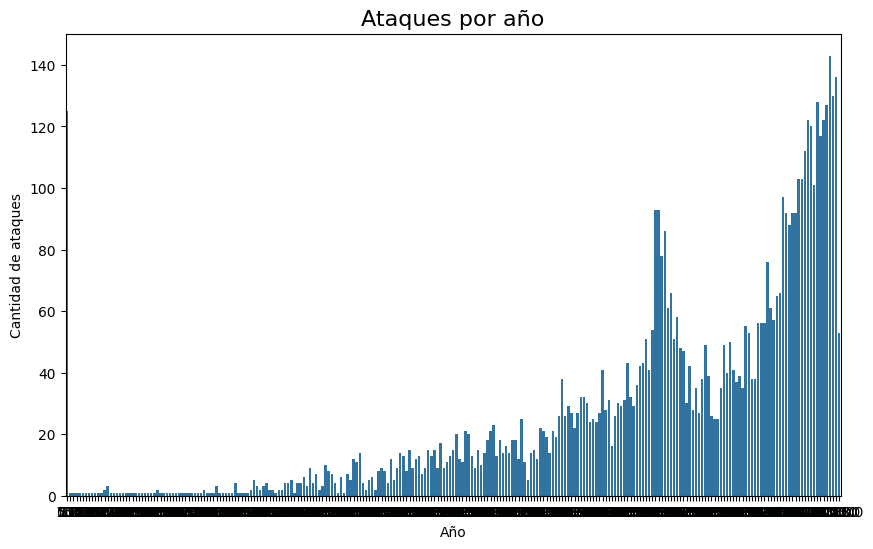

In [17]:
#sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x="Year", data=df)
plt.title("Ataques por año", fontsize=16)
plt.xlabel("Año")
plt.ylabel("Cantidad de ataques")
plt.show()

Una vez que hemos obtenido una estadìstica de la cantidad de ataques por año, podemos a partir de eso empezar a realizar nuestros análisis.

In [18]:
attacks_per_year = df.groupby(["Year", "Sex"])[['Fatal_YN']].count()

In [19]:
df.columns

Index(['Case_Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_YN', 'Time',
       'Species', 'Case_Number.1', 'Case_Number.2', 'original_order'],
      dtype='object')

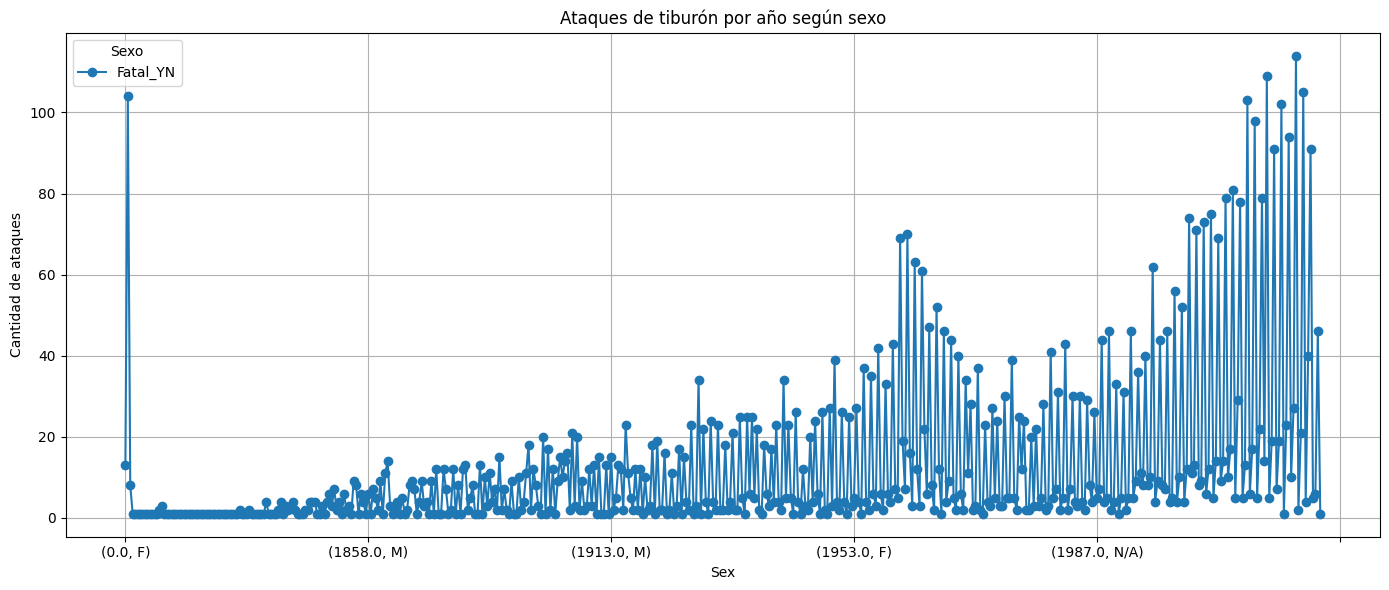

In [20]:
attacks_per_year.plot(figsize=(14, 6), marker='o')
plt.title("Ataques de tiburón por año según sexo")
plt.xlabel("Sex")
plt.ylabel("Cantidad de ataques")
plt.grid(True)
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2698486998.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




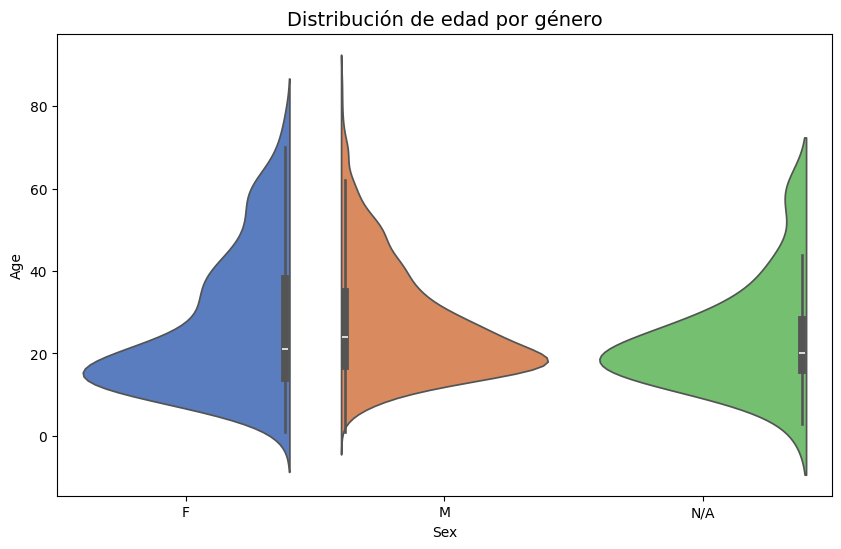

In [21]:
#Causas más comunes, según la playa
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Sex", y="Age", split=True, palette="muted")
plt.title("Distribución de edad por género", fontsize=14)
plt.show()


/tmp/ipython-input-2599400309.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




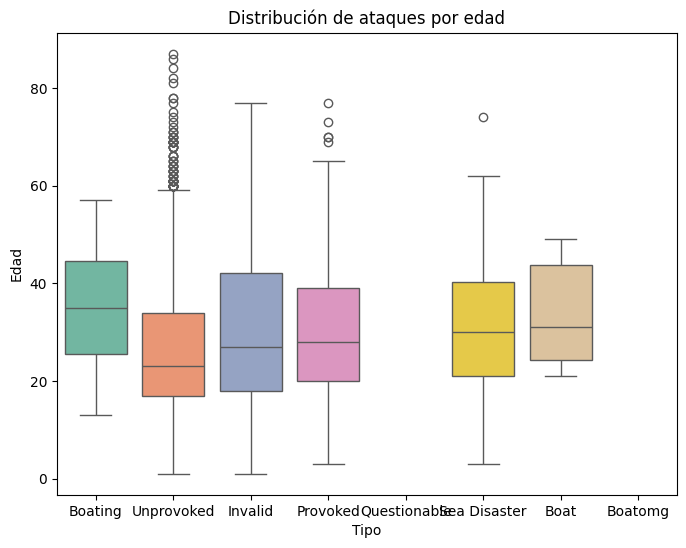

In [22]:
#Distribución de causas según la edad
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Type", y="Age", palette="Set2")
plt.title("Distribución de ataques por edad")
plt.xlabel("Tipo")
plt.ylabel("Edad")
plt.show()

In [23]:
#Muestra de playas con mayor cantidad de ataques

df["Location"] = df["Location"].str.strip().str.title()
df["Fatal"] = df["Fatal_YN"].str.strip().str.upper()

# Agrupar: total y fatales por ubicación
total = df['Location'].value_counts()
fatal = df[df['Fatal_YN'] == 'Y']['Location'].value_counts()

summary = pd.DataFrame({
    'Location': total.index,
    'Ataques': total.values,
    'Fatales': fatal.reindex(total.index).fillna(0).astype(int)
})

# Seleccionar las 10 playas con más ataques
top_summary = summary.nlargest(10, 'Ataques')

# Crear gráfico
fig = px.scatter(top_summary,
                 x="Ataques",
                 y="Location",
                 color="Fatales",
                 size="Fatales",
                 title="Top 10 playas con más ataques de tiburón",
                 labels={"Fatales": "Ataques fatales","Location":"Playa", "Ataques": "Total de ataques"},
                 color_continuous_scale="Reds")

fig.update_layout(yaxis_title="Playa",yaxis=dict(categoryorder='total ascending'))
fig.show()

In [24]:
#Distribución de ataques fatales según edad

fig = px.histogram(df, x="Age", color="Fatal_YN", nbins=30,
                   title="Distribución de edad por género",
                   color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(bargap=0.1)
fig.show()

In [25]:
#Porcentaje de mortalidad de ataques según el sexo y la edad en cada año.

df.groupby(["Fatal_YN", "Sex"])[['Year', 'Age']].mean()


Year        Age
Fatal_YN Sex                        
N        F    1956.442308  26.406433
         M    1947.110281  27.443885
         N/A  1944.205128  21.952381
N/A      F    1978.822581  24.085714
         M    1946.193182  29.925926
         N/A  1945.422018  33.500000
Y        F    1884.168224  30.681818
         M    1848.575085  26.783109
         N/A  1878.422018  23.750000